In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head(n=10)

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...

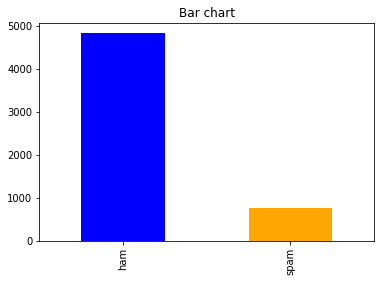

In [4]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

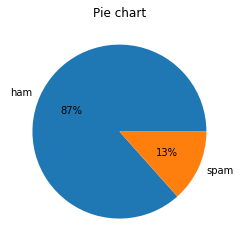

In [5]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [6]:
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

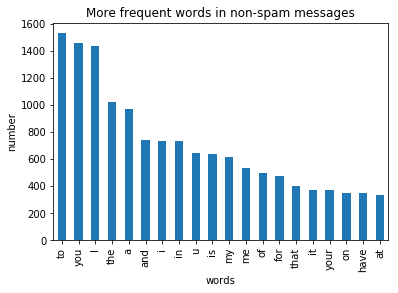

In [7]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

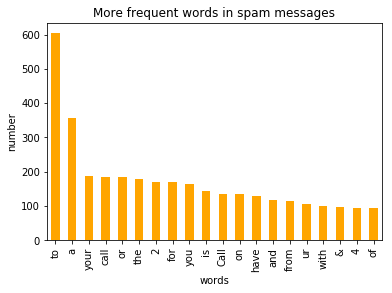

In [8]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [9]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)

(5572, 8404)

In [10]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8404), (1839, 8404)]


In [11]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [12]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

alpha  Train Accuracy  Test Accuracy  Test Recall  Test Precision
0  0.00001        0.998661       0.974443     0.920635        0.895753
1  0.11001        0.997857       0.976074     0.936508        0.893939
2  0.22001        0.997857       0.977162     0.936508        0.900763
3  0.33001        0.997589       0.977162     0.936508        0.900763
4  0.44001        0.997053       0.977162     0.936508        0.900763
5  0.55001        0.996250       0.976618     0.936508        0.897338
6  0.66001        0.996518       0.976074     0.932540        0.896947
7  0.77001        0.996518       0.976074     0.924603        0.903101
8  0.88001        0.996250       0.976074     0.924603        0.903101
9  0.99001        0.995982       0.976074     0.920635        0.906250

In [13]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             15.730010
Train Accuracy     0.979641
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

In [14]:
models[models['Test Precision']==1].head(n=5)

alpha  Train Accuracy  Test Accuracy  Test Recall  Test Precision
143  15.73001        0.979641       0.969549     0.777778             1.0
144  15.84001        0.979641       0.969549     0.777778             1.0
145  15.95001        0.979641       0.969549     0.777778             1.0
146  16.06001        0.979373       0.969549     0.777778             1.0
147  16.17001        0.979373       0.969549     0.777778             1.0

In [15]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             15.730010
Train Accuracy     0.979641
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

In [15]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

Predicted 0  Predicted 1
Actual 0         1587            0
Actual 1           56          196

In [16]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

In [17]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

C  Train Accuracy  Test Accuracy  Test Recall  Test Precision
0   500.0        0.994910       0.982599     0.873016             1.0
1   600.0        0.995982       0.982599     0.873016             1.0
2   700.0        0.996785       0.982599     0.873016             1.0
3   800.0        0.997053       0.983143     0.876984             1.0
4   900.0        0.997589       0.983143     0.876984             1.0
5  1000.0        0.998125       0.983143     0.876984             1.0
6  1100.0        0.998928       0.983143     0.876984             1.0
7  1200.0        0.999732       0.983143     0.876984             1.0
8  1300.0        1.000000       0.983143     0.876984             1.0
9  1400.0        1.000000       0.983143     0.876984             1.0

In [18]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      0.994910
Test Accuracy       0.982599
Test Recall         0.873016
Test Precision      1.000000
Name: 0, dtype: float64

In [19]:
models[models['Test Precision']==1].head(n=5)

C  Train Accuracy  Test Accuracy  Test Recall  Test Precision
0  500.0        0.994910       0.982599     0.873016             1.0
1  600.0        0.995982       0.982599     0.873016             1.0
2  700.0        0.996785       0.982599     0.873016             1.0
3  800.0        0.997053       0.983143     0.876984             1.0
4  900.0        0.997589       0.983143     0.876984             1.0

In [20]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 800.000000
Train Accuracy      0.997053
Test Accuracy       0.983143
Test Recall         0.876984
Test Precision      1.000000
Name: 3, dtype: float64

In [21]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

Predicted 0  Predicted 1
Actual 0         1587            0
Actual 1           31          221

In [1]:
Y = ["You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to:"] 
f = feature_extraction.text.CountVectorizer(stop_words = 'english')

f.fit(data["v2"]) 

X = f.transform(Y) 
res=svc.predict(X)
print(res)
if res==0:

    print('\n\n The Email is a ham')
else:

    print('\n\nThe Email is a spam')

NameError: name 'feature_extraction' is not defined

In [ ]:
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>>
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still?
07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile 
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect?
Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc
As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a å£1500 
Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or å£1000. To claim txt DIS to 87121 18+6*å£1.50
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. å£1.50
Want 2 get laid tonight? Want real Dogging locations sent direct 2 ur mob? Join the UK's 
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to:

